In [1]:
#import libraries required for analysis
from change_detection import functions as chg
from change_detection import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
from outliers import *  #importing outliers from a branch ebmdatalab pandas library - it will be placed in its own repo to install at a later dat

In [2]:
opioids = chg.ChangeDetection('ccg_data_opioid%',measure=True) ## .run() This is commented so the code isn't rerun and files reproduced -its takes circa 30 min per measur
opioids = opioids.concatenate_outputs()

In [3]:
opioids = opioids.reset_index()
opioids.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,ccg_data_opioidome,00C,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ccg_data_opioidome,00D,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ccg_data_opioidome,00J,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ccg_data_opioidome,00K,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ccg_data_opioidome,00L,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ccg_data_opioidome = opioids.loc[(opioids["measure"] == "ccg_data_opioidome")]


In [5]:
ccg_data_opioidspercent = opioids.loc[(opioids["measure"] == "ccg_data_opioidspercent")]


In [6]:
ccg_data_opioidper1000 = opioids.loc[(opioids["measure"] == "ccg_data_opioidper1000")]
ccg_data_opioidper1000.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
191,ccg_data_opioidper1000,00C,2,20.0,20.0,35.0,35.0,20.0,0.065739,0.022205,0.514286,2.894864,3.022690,-0.127827,-0.044156
192,ccg_data_opioidper1000,00D,2,17.0,17.0,31.0,31.0,17.0,0.033582,0.009687,0.553786,3.433336,3.493978,-0.060641,-0.017663
193,ccg_data_opioidper1000,00J,1,49.0,49.0,49.0,49.0,49.0,-0.035633,-0.014250,0.583333,2.536202,2.108601,0.427602,0.168599
194,ccg_data_opioidper1000,00K,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,ccg_data_opioidper1000,00L,2,17.0,17.0,35.0,35.0,35.0,-0.027819,-0.009997,0.885687,2.746126,2.683307,0.062819,0.022876


## Total OME

In [7]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidome/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']

# is.slope.ma Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
omeisslopema = ccg_data_opioidome.sort_values("is.slope.ma", ascending=False).head(5)
omeisslopema = omeisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
omeisslopemaprop = ccg_data_opioidome.sort_values("is.slope.ma.prop", ascending=False).head(5)
omeisslopeamprop = omeisslopemaprop.set_index('name')


#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
omeintlevlevprop = ccg_data_opioidome.sort_values("is.intlev.levdprop", ascending=False).head(5) 
omeintlevlevprop = omeintlevlevprop.set_index('name')

,is.tfirst.big,is.intlev.levdprop,plots
name,,,
04Y,5.0,-0.109475,
06F,15.0,0.097050,
08D,10.0,0.110259,
07M,13.0,0.106182,
08X,13.0,0.110499,

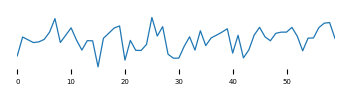
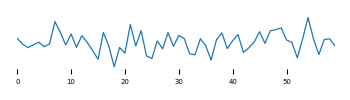
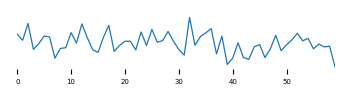
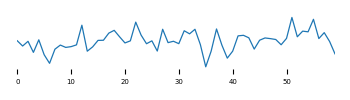
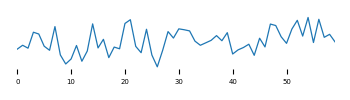

In [8]:
ser = sparkline_table(data, 'rate', subset=omeisslopeamprop.index)
ser
omeisslopeamprop[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
04Y,5.0,0.001951,
06F,15.0,-0.002114,
08D,10.0,-0.002167,
07M,13.0,-0.002217,
08X,13.0,-0.002307,

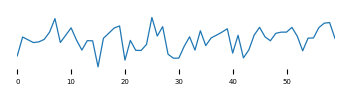
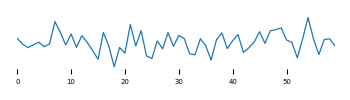
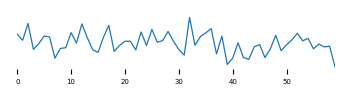
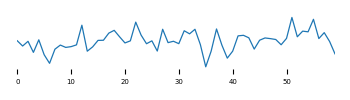
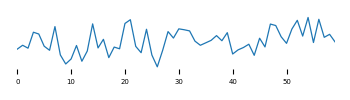

In [9]:
ser = sparkline_table(data, 'rate', subset=omeisslopeamprop.index)
ser
omeisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.slope.ma,plots
name,,,
04Y,5.0,85.618174,
08X,13.0,-22.193904,
08D,10.0,-27.536740,
07M,13.0,-35.472013,
07V,27.0,-40.471029,

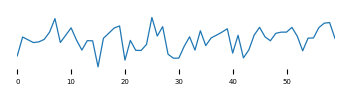
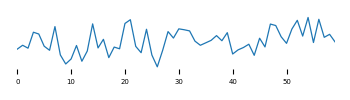
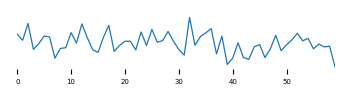
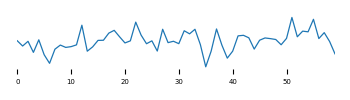
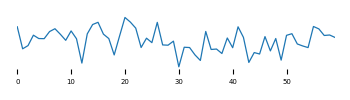

In [10]:
ser = sparkline_table(data, 'rate', subset=omeisslopema.index)
ser
omeisslopema [["is.tfirst.big","is.slope.ma"]].join(ser)

## ccg_data_opioidspercent

[High dose opioids as percentage regular opioids](https://openprescribing.net/measure/opioidspercent/)  

In [11]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidspercent/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']

#Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
highdoseisslopema = ccg_data_opioidspercent.sort_values("is.slope.ma", ascending=False).head(5)
highdoseisslopema = highdoseisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
highdoseisslopemaprop = ccg_data_opioidspercent.sort_values("is.slope.ma.prop", ascending=False).head(5)
highdoseisslopeamprop = highdoseisslopemaprop.set_index('name')

#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
highdoseintlevlevprop = ccg_data_opioidspercent.sort_values("is.intlev.levdprop", ascending=False).head(5) 
highdoseintlevlevprop = highdoseintlevlevprop.set_index('name')

,is.tfirst.big,is.slope.ma,plots
name,,,
00Q,17.0,0.013718,
10R,38.0,0.006681,
00C,22.0,0.004094,
09W,5.0,-0.000241,
06N,4.0,-0.000275,

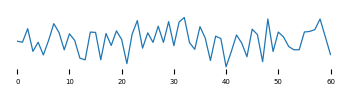
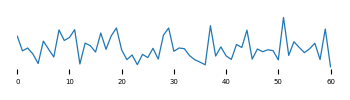
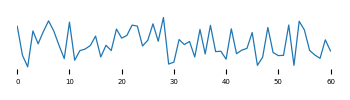
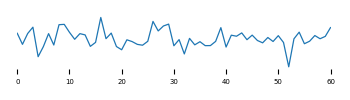
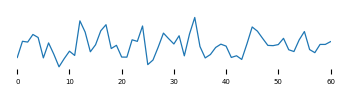

In [12]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopema.index)
ser
highdoseisslopema[["is.tfirst.big","is.slope.ma"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
00Q,17.0,0.064141,
10R,38.0,0.037424,
00C,22.0,0.022296,
09W,5.0,-0.001394,
06N,4.0,-0.001506,

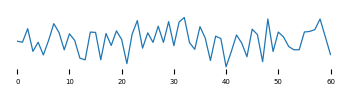
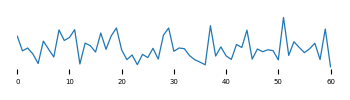
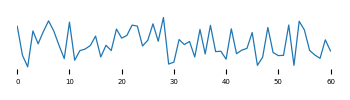
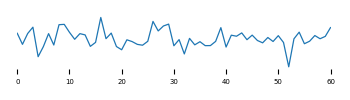
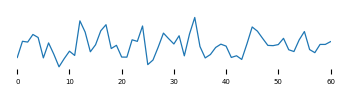

In [13]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopeamprop.index)
ser
highdoseisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.intlev.levdprop,plots
name,,,
00Q,17.0,-0.024969,
10R,38.0,-0.003448,
00C,22.0,-0.044597,
09W,5.0,0.079373,
06N,4.0,0.087199,

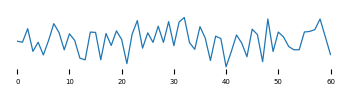
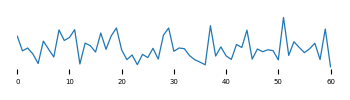
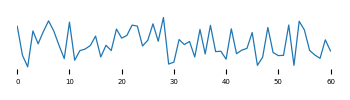
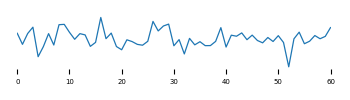
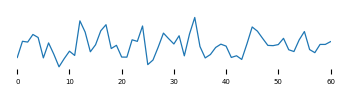

In [14]:
ser = sparkline_table(data, 'rate', subset=highdoseisslopema.index)
ser
highdoseisslopema[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

## High dose opioids per 1000 patients

[High dose opioids per 1000 patients](https://openprescribing.net/measure/opioidper1000/)

In [15]:
data = pd.read_csv('data/ccg_data_opioid/ccg_data_opioidper1000/bq_cache.csv',index_col='code')
data['rate'] = data['numerator'] / data['denominator']

#Average slope over steepest segment contributing at least XX% of total drop is.slope.ma
higdoseistsizeisslopema = ccg_data_opioidome.sort_values("is.slope.ma", ascending=False).head(5)
higdoseistsizeisslopema = higdoseistsizeisslopema.set_index('name')

#is.slope.ma.prop Average slope as proportion to prior level
higdoseistsizeisslopemaprop = ccg_data_opioidome.sort_values("is.slope.ma.prop", ascending=False).head(5)
higdoseistsizeisslopeamprop = higdoseistsizeisslopemaprop.set_index('name')

#is.intlev.levdprop Percentage of the total drop the segment used to evaluate the slope makes up
higdoseistsizeintlevlevprop = ccg_data_opioidome.sort_values("is.intlev.levdprop", ascending=False).head(5) 
higdoseistsizeintlevlevprop = higdoseistsizeintlevlevprop.set_index('name')


,is.tfirst.big,is.intlev.levdprop,plots
name,,,
08C,27.0,0.327867,
02D,12.0,0.305159,
06M,27.0,0.263200,
01D,33.0,0.256618,
09D,27.0,0.254256,

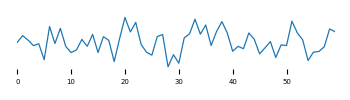
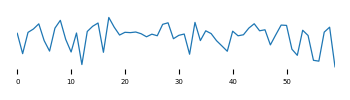
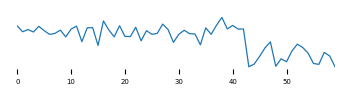
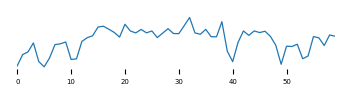
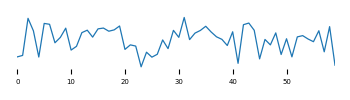

In [16]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeintlevlevprop.index)
ser
higdoseistsizeintlevlevprop[["is.tfirst.big","is.intlev.levdprop"]].join(ser)

,is.tfirst.big,is.slope.ma.prop,plots
name,,,
04Y,5.0,0.001951,
06F,15.0,-0.002114,
08D,10.0,-0.002167,
07M,13.0,-0.002217,
08X,13.0,-0.002307,

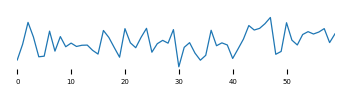
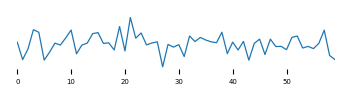
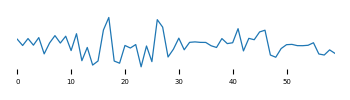
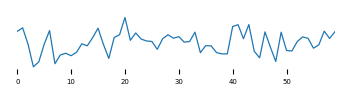
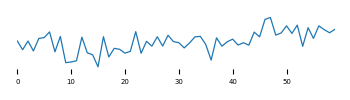

In [17]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeisslopeamprop.index)
ser
higdoseistsizeisslopeamprop[["is.tfirst.big","is.slope.ma.prop"]].join(ser)

,is.tfirst.big,is.slope.ma,plots
name,,,
04Y,5.0,85.618174,
08X,13.0,-22.193904,
08D,10.0,-27.536740,
07M,13.0,-35.472013,
07V,27.0,-40.471029,

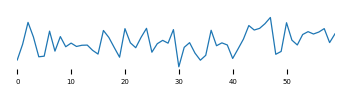
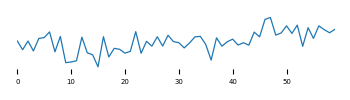
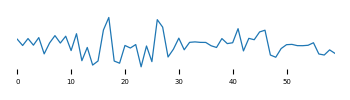
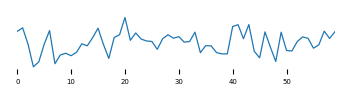
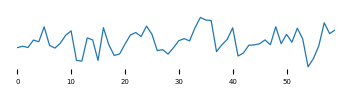

In [18]:
ser = sparkline_table(data, 'rate', subset=higdoseistsizeisslopema.index)
ser
higdoseistsizeisslopema[["is.tfirst.big","is.slope.ma"]].join(ser)